In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, OrdinalEncoder

In [7]:
import torch
print(torch.cuda.is_available())  # Should return True
print(torch.cuda.device_count())  # Number of GPUs available
print(torch.cuda.get_device_name(0))  # Your NVIDIA GPU name

False
0


AssertionError: Torch not compiled with CUDA enabled

In [225]:
# titanic dataset, unzip it imported as train.csv (training dataset)

import pandas as pd
df = pd.read_csv('train.csv')
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [227]:
#drop unnecessary rows

df.drop(["Name","Cabin","SibSp","Parch","Ticket"],axis=1,inplace=True)

In [228]:
#checking null value
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Fare             0
Embarked         2
dtype: int64

In [229]:
#replace null value in age with median

age=df['Age'].median()
df['Age']= df['Age'].fillna(age)

In [230]:
#embarked value count and empty value fill with S
df['Embarked'].value_counts()

df['Embarked']=df['Embarked'].fillna('S')

df.isnull().sum()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     891 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [231]:
#sorting and grouping

#sort
df['Age'].value_counts().sort_index()

#age round integer
df['Age']=round(df['Age']).astype('int')
df.nunique()


#age grouping
df['Age'].value_counts().sort_index()

def categorize_age(age):
    if age <= 4:
        return "Baby"
    elif age <= 12 and age>=5:
        return "Child"
    elif age>=13 and age <= 19:
        return "Teen"
    elif age>=20 and age <= 39:
        return "Adult"
    elif age >=40 and age <= 59:
        return "Middle Age Adult"
    else:
        return "Senior Adult"
df["Age_group"] = df["Age"].apply(categorize_age)
df["Age_group"].value_counts()
df.pop("Age")

df['Fare']=df['Fare'].round(4)

In [232]:
#encoding and feature scaling

from sklearn.preprocessing import OneHotEncoder,LabelEncoder, OrdinalEncoder

from sklearn.compose import ColumnTransformer

# Convert 'Sex' column to a NumPy array with the correct shape
df["Sex"] = df["Sex"].astype(str)  # Ensuring values are treated as strings


Ohe=OneHotEncoder(drop='first',sparse_output=False)
OE=OrdinalEncoder(categories=[[1,2,3],["Baby", "Child", "Teen", "Adult", "Middle Age Adult", "Senior Adult"]])
binary_encoder = OrdinalEncoder(categories=[["male", "female"]])  # Explicit categories

preprocessor = ColumnTransformer([
    ("onehot_encoding", Ohe, ["Embarked"]),
    ("ordinal_encoding", OE, ["Pclass", "Age_group"]),
    ("binary_encoding", binary_encoder, ["Sex"])  # Apply binary encoding to Sex
], remainder="passthrough")

df_encoded = preprocessor.fit_transform(df)
df_encoded = pd.DataFrame(df_encoded, columns=preprocessor.get_feature_names_out())

print(df_encoded.head())  # Check results


df_encoded.rename(columns={"remainder__PassengerId":"PassengerId", "remainder__Fare":"Fare","binary_encoding__Sex":"Sex", "onehot_encoding__Embarked_Q":"Embarked_Q", "onehot_encoding__Embarked_S":"Embarked_S", "ordinal_encoding__Pclass":"Pclass", "ordinal_encoding__Age_group":"Age_group","remainder__Survived":"Survived"},inplace=True)


#feature scaling

#from sklearn.preprocessing import StandardScaler
#scale=StandardScaler()
#scaler=ColumnTransformer([("scaling",scale,['Fare'])],remainder="passthrough")
#df_scaled=scaler.fit_transform(df_encoded)

#df_encoded.info()

   onehot_encoding__Embarked_Q  onehot_encoding__Embarked_S  \
0                          0.0                          1.0   
1                          0.0                          0.0   
2                          0.0                          1.0   
3                          0.0                          1.0   
4                          0.0                          1.0   

   ordinal_encoding__Pclass  ordinal_encoding__Age_group  \
0                       2.0                          3.0   
1                       0.0                          3.0   
2                       2.0                          3.0   
3                       0.0                          3.0   
4                       2.0                          3.0   

   binary_encoding__Sex  remainder__PassengerId  remainder__Survived  \
0                   0.0                     1.0                  0.0   
1                   1.0                     2.0                  1.0   
2                   1.0                     

In [233]:
#ensure Survived is in int type
df_encoded["Survived"] = df_encoded["Survived"].astype(int)

# Define the features and the target variable
X = df_encoded.drop(['Survived'], axis=1) #independent variables (predictors) 
y = df_encoded['Survived'] #dependent variables (target


In [234]:
#handling data imbalance

from collections import Counter
Counter(y)

## handling imbalanced data
from imblearn.combine import SMOTEENN
sm = SMOTEENN(random_state=0)
X_resampled, y_resampled = sm.fit_resample(X,y)

Counter(y_resampled)



# Split the data into training+validation and testing sets (80% training+validation, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

X_train

y_train

y_test


#summarize missing values - X_train
X_train.isnull().sum()

Embarked_Q     0
Embarked_S     0
Pclass         0
Age_group      0
Sex            0
PassengerId    0
Fare           0
dtype: int64

In [235]:
# Define models
models_titanic = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train and evaluate models


# Train and evaluate models
def evaluate_models(X_train, X_test, y_train, y_test):
    results = []
    predictions = {}  # Store predictions for manual inspection
    
    for name, model in models_titanic.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append((name, acc))
        predictions[name] = y_pred  # Save predictions for each model
    
    # Sort models by accuracy
    results.sort(key=lambda x: x[1], reverse=True)
    return results, predictions

# Evaluate models and get predictions
results, predictions = evaluate_models(X_train, X_test, y_train, y_test)

# Convert prediction list of tuples into DataFrame

predictions_df = pd.DataFrame(predictions)
print(predictions_df)


# Create DataFrame to compare actual vs. predicted values for the best model
best_model_name = results[0][0]  # after soring (results.sort)Get the model with highest accuracy
y_test_pred = predictions[best_model_name]  # Get its predictions

df_comparison = pd.DataFrame({
    "Actual Value": y_test,
    "Predicted Value": y_test_pred
})

# Print first few rows for manual inspection
print("\nActual vs. Predicted values for the best model:")
print(df_comparison.head())

# Save to Excel for further inspection (optional)
df_comparison.to_excel("predictions.xlsx", index=False)
print("Saved predictions to predictions.xlsx")

# Print model performance
print("Model Performance:")
for name, acc in results: print(f"{name}: {acc:.6f}")
    

c:\Users\ratsa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


    Logistic Regression  Random Forest  Gradient Boosting  Decision Tree  \
0                     1              1                  1              1   
1                     0              0                  0              0   
2                     1              1                  1              1   
3                     1              1                  1              1   
4                     0              0                  0              0   
..                  ...            ...                ...            ...   
67                    1              1                  1              1   
68                    1              1                  1              1   
69                    0              0                  0              0   
70                    1              1                  1              1   
71                    1              1                  1              1   

    Support Vector Machine  K-Nearest Neighbors  
0                        1           

In [236]:
#prediction for new data, test.csv

new_data =  pd.read_csv('test.csv')
new_data.info()


new_data.drop(["Name","Cabin","SibSp","Parch","Ticket"],axis=1,inplace=True)

#checking null value
new_data.isnull().sum()

age=new_data['Age'].median()
new_data['Age']= new_data['Age'].fillna(age)

#or
# age which contain null value replaced by median
#df['Age'].fillna(df['Age'].median(), inplace=True)

#embarked value count and empty value fill with S
new_data['Embarked'].value_counts()

new_data['Embarked']=new_data['Embarked'].fillna('S')

#new_data['Fare'].fillna(new_data['Fare'].median())

fare=new_data['Fare'].median()
new_data['Fare']= new_data['Fare'].fillna(fare)

new_data.isnull().sum()

new_data.info()

#sort
new_data['Age'].value_counts().sort_index()

#making age round integer

new_data['Age']=round(new_data['Age']).astype('int')

new_data['Fare']=new_data['Fare'].round(4)

new_data.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex      

PassengerId    418
Pclass           3
Sex              2
Age             63
Fare           169
Embarked         3
dtype: int64

In [237]:
#making age group
new_data['Age'].value_counts().sort_index()

def categorize_age(age):
    if age <= 4:
        return "Baby"
    elif age <= 12 and age>=5:
        return "Child"
    elif age>=13 and age <= 19:
        return "Teen"
    elif age>=20 and age <= 39:
        return "Adult"
    elif age >=40 and age <= 59:
        return "Middle Age Adult"
    else:
        return "Senior Adult"
new_data["Age_group"] = new_data["Age"].apply(categorize_age)


new_data["Age_group"].value_counts()

new_data.pop("Age")

new_data['Fare']=new_data['Fare'].round(4)


In [238]:
# encode categories, Pclass-ordinal enco., Sex-binary enco., embarked-one hot enco., age-group-ordinal


from sklearn.compose import ColumnTransformer
preprocessor=ColumnTransformer([("onehot_encoding",Ohe,["Embarked"]), \
                               ("ordinal_encoding",OE,["Pclass","Age_group"])],remainder="Fare")



# Convert 'Sex' column to a NumPy array with the correct shape
new_data["Sex"] = new_data["Sex"].astype(str)  # Ensuring values are treated as strings



Ohe=OneHotEncoder(drop='first',sparse_output=False)
OE=OrdinalEncoder(categories=[[1,2,3],["Baby", "Child", "Teen", "Adult", "Middle Age Adult", "Senior Adult"]])
binary_encoder = OrdinalEncoder(categories=[["male", "female"]])  # Explicit categories

preprocessor = ColumnTransformer([
    ("onehot_encoding", Ohe, ["Embarked"]),
    ("ordinal_encoding", OE, ["Pclass", "Age_group"]),
    ("binary_encoding", binary_encoder, ["Sex"])  # Apply binary encoding to Sex
], remainder="passthrough")

new_data_encoded = preprocessor.fit_transform(new_data)
new_data_encoded = pd.DataFrame(new_data_encoded, columns=preprocessor.get_feature_names_out())

print(new_data_encoded.head())  # Check results


new_data_encoded.rename(columns={ "remainder__PassengerId":"PassengerID", "remainder__Fare":"Fare","binary_encoding__Sex":"Sex", "onehot_encoding__Embarked_Q":"Embarked_Q", "onehot_encoding__Embarked_S":"Embarked_S", "ordinal_encoding__Pclass":"Pclass", "ordinal_encoding__Age_group":"Age_group"},inplace=True)


new_data_encoded.info()

   onehot_encoding__Embarked_Q  onehot_encoding__Embarked_S  \
0                          1.0                          0.0   
1                          0.0                          1.0   
2                          1.0                          0.0   
3                          0.0                          1.0   
4                          0.0                          1.0   

   ordinal_encoding__Pclass  ordinal_encoding__Age_group  \
0                       2.0                          3.0   
1                       2.0                          4.0   
2                       1.0                          5.0   
3                       2.0                          3.0   
4                       2.0                          3.0   

   binary_encoding__Sex  remainder__PassengerId  remainder__Fare  
0                   0.0                   892.0           7.8292  
1                   1.0                   893.0           7.0000  
2                   0.0                   894.0           9

In [241]:
#prediction for test

new_predictions = models_titanic['Gradient Boosting'].predict(new_data_encoded)


best_model = GradientBoostingClassifier()  
best_model.fit(X_train, y_train) 

y_pred_new = best_model.predict(new_data_encoded)
new_data_encoded["Predicted_Survived"] = y_pred_new
print(new_data_encoded.head())

#review prediction distributions:
print(pd.Series(y_pred_new).value_counts())



ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- PassengerID
Feature names seen at fit time, yet now missing:
- PassengerId


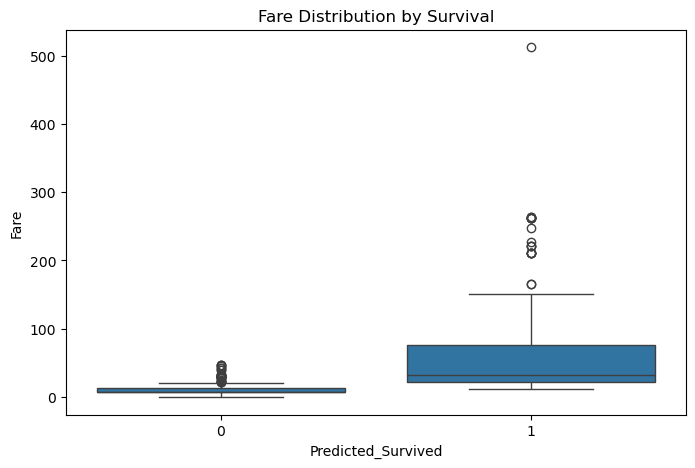

In [ ]:
#boxplot

plt.figure(figsize=(8, 5))
sns.boxplot(data=new_data_encoded, x="Predicted_Survived", y="Fare")

plt.xlabel("Predicted_Survived")
plt.ylabel("Fare")
plt.title("Fare Distribution by Survival")
plt.show()

new_data_encoded.to_csv("new_data_encoded.csv", index=False)





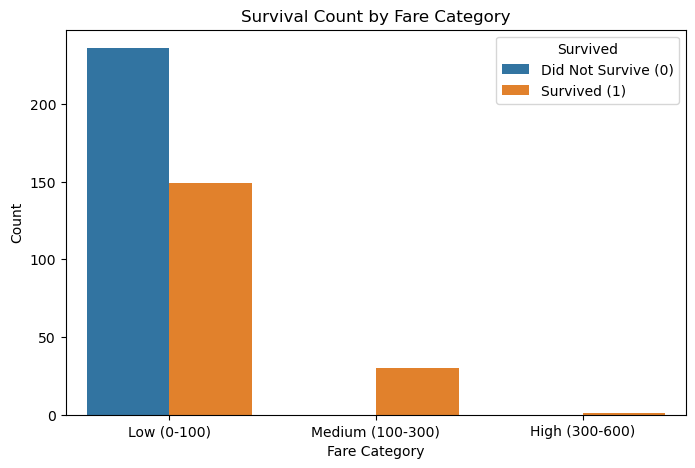

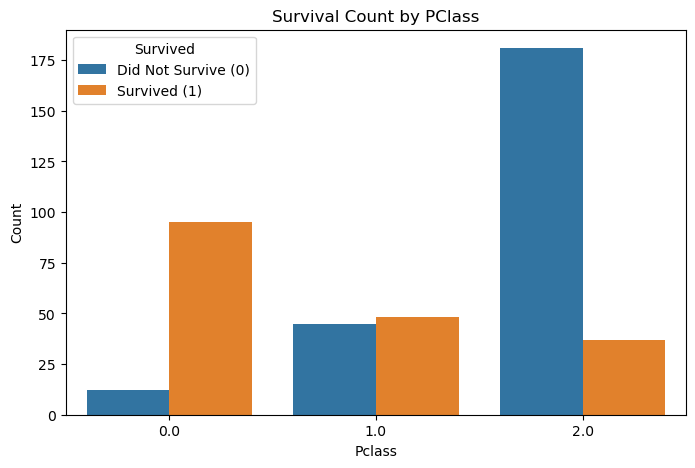

In [ ]:
# ploting group wise

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define bins and labels
bins = [0, 100, 300, 600]
labels = ["Low (0-100)", "Medium (100-300)", "High (300-600)"]

# Create a new column with categorized fare values
new_data_encoded["Fare_Category"] = pd.cut(new_data_encoded["Fare"], bins=bins, labels=labels)

plt.figure(figsize=(8, 5))
sns.countplot(data=new_data_encoded, x="Fare_Category", hue="Predicted_Survived")

plt.xlabel("Fare Category")
plt.ylabel("Count")
plt.title("Survival Count by Fare Category")
plt.legend(title="Survived", labels=["Did Not Survive (0)", "Survived (1)"])
plt.show()


new_data_encoded['Pclass'].value_counts()

plt.figure(figsize=(8, 5))
sns.countplot(data=new_data_encoded, x="Pclass", hue="Predicted_Survived")

plt.xlabel("Pclass")
plt.ylabel("Count")
plt.title("Survival Count by PClass")
plt.legend(title="Survived", labels=["Did Not Survive (0)", "Survived (1)"])
plt.show()
